In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from tqdm.notebook import tqdm, trange
import pickle as pkl

%load_ext autoreload
%autoreload 2

In [3]:
from bs_helpers import *
from bs_gameclass import *


In [4]:
s = GameState()

vm = GameClass.getValidActions(s)
#s = GameClass.getNextState(s, vm[4])

In [18]:
class TrivialPlayer:
    def findmove(self, s):
        va = GameClass.getValidActions(s)
        len(va)
        return va[np.random.choice(len(va))]
    
class UnetPlayer:
    def findmove(self, s):
        prob = net.predict(encode_x(s.sea, s.det))
        prob[s.det > 0] = 0
        ij = prob.argmax()
        i, j = ij//SX, ij%SX
        return i, j

In [19]:
ai = UnetPlayer()
rs = []
for _ in trange(100):
    s = GameState()
    hidden = create_sea()
    r = None
    while not r:
        a = ai.findmove(s)
        s = GameClass.getNextState(s, a, hidden)
        r = GameClass.getEnded(s)
    rs += [r]

  0%|          | 0/100 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

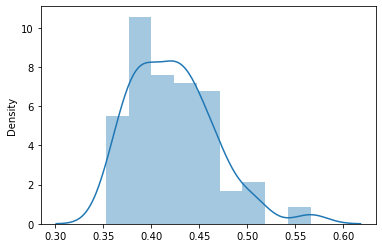

In [20]:
import seaborn as sns
sns.distplot(rs)

In [21]:
np.mean(rs), np.std(rs)

(0.4224928125897383, 0.043169275464149975)